In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

start_date = '2019-01-01'
end_date = '2022-01-01'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])
# Recreate a DatetimeIndex with a specific frequency

freq = 'D'  # Monthly frequency
date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)

prices = np.sin(unix_dates)

for i in range(len(prices)):
    prices[i] = prices[i] + float(i) / 50

data = pd.DataFrame({'ds': date_rng, 'y': prices})

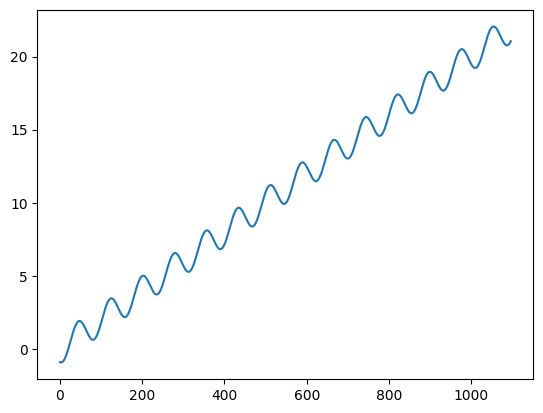

In [2]:
plt.plot(prices)

In [3]:
prices_diff = np.diff(prices)

In [4]:
len(prices)

1097

In [5]:
len(prices_diff)

1096

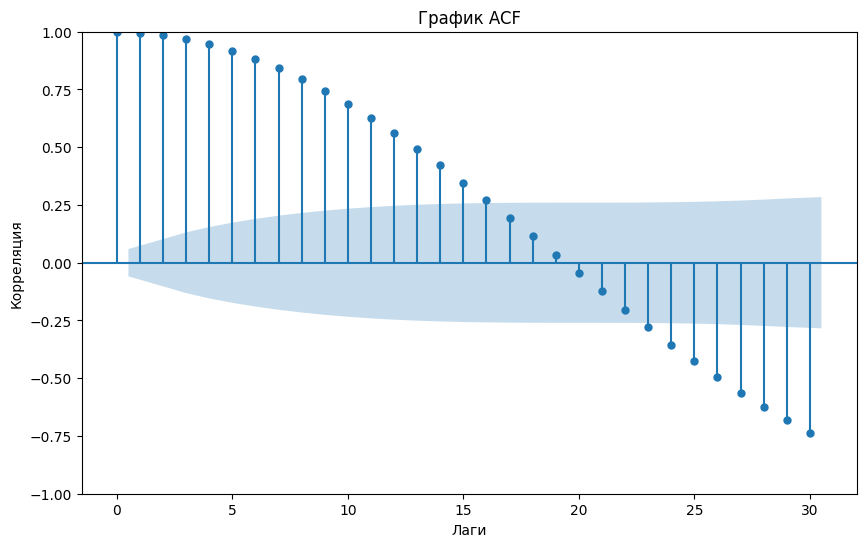

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


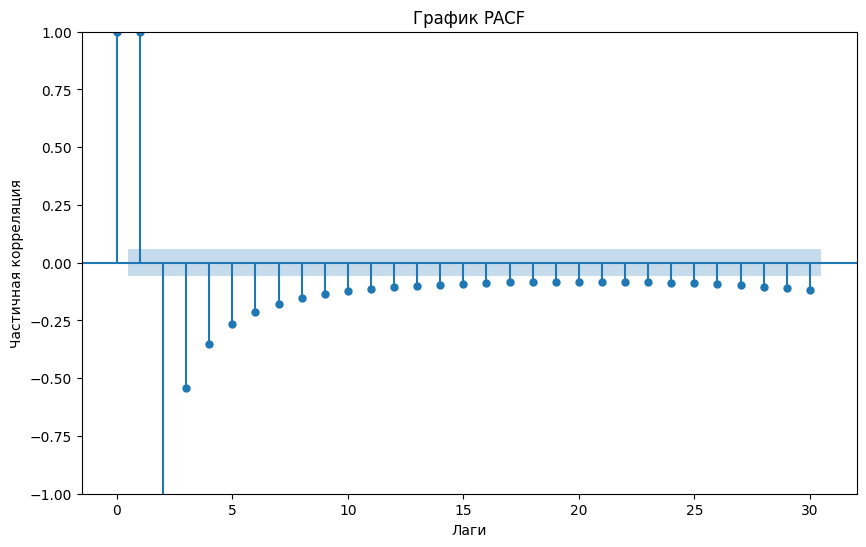

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# Построение графика автокорреляционной функции (ACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(prices_diff, lags=30, ax=ax)  # Установите значение lags в соответствии с вашими потребностями
plt.xlabel('Лаги')
plt.ylabel('Корреляция')
plt.title('График ACF')
plt.show()
# Построение графика частичной автокорреляционной функции (PACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(prices_diff, lags=30, ax=ax)  # Установите значение lags в соответствии с вашими потребностями
plt.xlabel('Лаги')
plt.ylabel('Частичная корреляция')
plt.title('График PACF')
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(prices_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3369737147500.961
p-value: 0.0


In [8]:
train_size = int(len(prices_diff) * 0.7)
test_size = len(prices_diff) - train_size

In [9]:
model_data = pd.DataFrame({'Price': prices_diff[0:train_size], 'Date': date_rng[1:train_size + 1]})
model_data = model_data.set_index('Date', inplace = False)
model_data.head(10)

,Price
Date,
2019-01-02,-0.014774
2019-01-03,-0.008716
2019-01-04,-0.002470
2019-01-05,0.003924
2019-01-06,0.010425
2019-01-07,0.016988
2019-01-08,0.023571
2019-01-09,0.030131
2019-01-10,0.036624


In [17]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(model_data["Price"], order = (1, 1, 1))

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [18]:
model_fit = model.fit()

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [19]:
forecast = model_fit.forecast(steps = test_size) 

In [20]:
len(forecast.values)

329

In [22]:
temp_val = [model_data["Price"][-330]]
temp_val.extend(forecast.values)
temp_val = np.cumsum(temp_val)

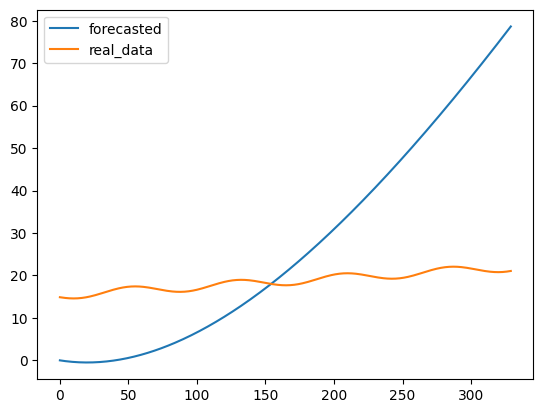

In [23]:
plt.plot(temp_val, label = "forecasted")
plt.plot(prices[train_size:], label = "real_data")
plt.legend()